In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [2]:
filename = 'flowVolume.csv'

# 读取CSV文件
data = pd.read_csv(filename)

# 提取时间和流量数据
time = data['time'].values
flow_volume = data['flow volume'].values

data

,time,flow volume
0,0,1.2
1,1,1.0
2,2,0.8
3,3,0.6
4,4,0.4
5,5,0.6
6,6,1.2
7,7,2.4
8,8,4.0
9,9,6.0


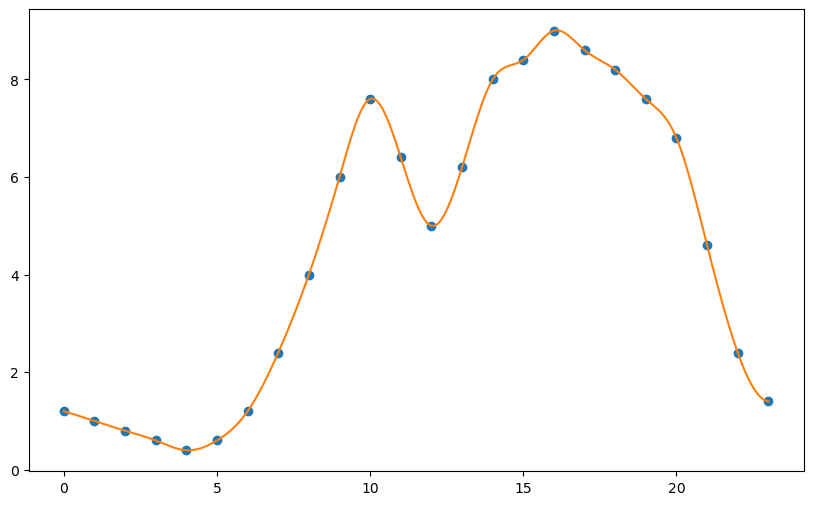

In [30]:
# 创建插值函数，用于生成光滑曲线
f = interp1d(time, flow_volume, kind='cubic', fill_value="extrapolate")

# 创建用于绘图的更密集的时间点
dense_time = np.linspace(time[0], time[-1], 300)

# 使用插值函数计算密集时间点的流量
dense_flow_volume = f(dense_time)

# 绘制原始数据点
plt.figure(figsize=(10, 6))
plt.plot(time, flow_volume, 'o', label='Original Data')

# 绘制拟合曲线
plt.plot(dense_time, dense_flow_volume, '-', label='Smooth Curve')

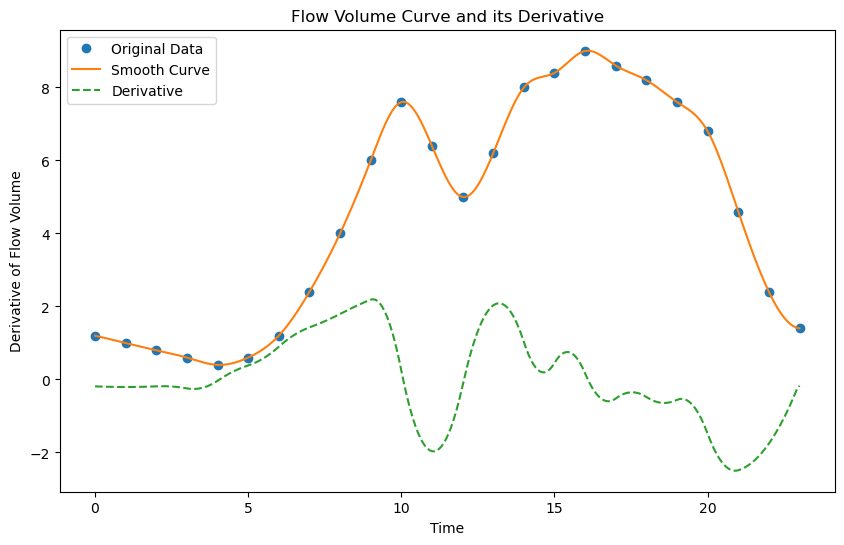

In [31]:
# 计算时间点之间的平均间距
time_spacing = np.mean(np.diff(dense_time))

# 使用np.gradient来计算导数，这里我们计算的是流量相对于时间的变化率
derivative = np.gradient(dense_flow_volume, time_spacing)

# 绘制原始数据点
plt.figure(figsize=(10, 6))
plt.plot(time, flow_volume, 'o', label='Original Data')

# 绘制拟合曲线
plt.plot(dense_time, dense_flow_volume, '-', label='Smooth Curve')

# 绘制导数曲线
plt.plot(dense_time, derivative, '--', label='Derivative')

# 添加图例和标签
plt.legend()
plt.xlabel('Time')
plt.ylabel('Derivative of Flow Volume')
plt.title('Flow Volume Curve and its Derivative')

# 显示图表
plt.show()

In [32]:
for i in range(len(dense_time)):
    print(dense_time[i],derivative[i])

0.0 -0.18873514423138227
0.07692307692307693 -0.19008692692361417
0.15384615384615385 -0.19267784375039765
0.23076923076923078 -0.19504346346181034
0.3076923076923077 -0.19718378605784792
0.38461538461538464 -0.19909881153851328
0.46153846153846156 -0.20078853990380208
0.5384615384615385 -0.2022529711537201
0.6153846153846154 -0.20349210528827166
0.6923076923076923 -0.20450594230744668
0.7692307692307693 -0.20529448221124946
0.8461538461538463 -0.2058577249996829
0.9230769230769231 -0.2061956706727398
1.0 -0.2063083192304252
1.076923076923077 -0.20619567067273908
1.153846153846154 -0.20585772499968147
1.2307692307692308 -0.20529448221124946
1.3076923076923077 -0.20450594230744595
1.3846153846153846 -0.20349210528827383
1.4615384615384617 -0.20225297115372298
1.5384615384615385 -0.20078853990380136
1.6153846153846154 -0.1990988115385111
1.6923076923076925 -0.19718378605784648
1.7692307692307694 -0.19504346346180818
1.8461538461538463 -0.19267784375039837
1.9230769230769231 -0.1900869269

In [1]:
import json
import pandas as pd
import numpy as np
# 从文件读取
with open('data_case.json', 'r') as f:
    path_data = json.load(f)
#print(path_data)
dist = pd.read_csv('dist_case.csv',header=0,index_col=0)
dist = dist.applymap(np.abs)

weight = pd.read_csv('population_case.csv',header=0,index_col=None)

In [2]:
interaction = {}
for p in path_data:
    # Ensure all inputs are scalars
    source_weight = weight[path_data[p]['source']].values[0]  # Extract scalar
    root_weight = weight[path_data[p]['root']].values[0]  # Extract scalar
    distance = dist[path_data[p]['source']][path_data[p]['root']]  # Assuming dist is already a scalar

    # Print scalar values
    print(source_weight, root_weight, distance)

    # Calculate interaction and assign it as a scalar value
    interaction[p] = source_weight * root_weight / distance**2
    
    # Print the scalar value of interaction for each path
    print(interaction[p])

2185 553 281
15.302554425602512
2185 943 477
9.055790690417485
2185 902 719
3.8124152498931254
2185 450 1002
0.9793287676144716
2185 2487 1213
3.6932237936234893
553 2185 281
15.302554425602512
553 902 438
2.600060465795125
553 450 721
0.47870406528149956
553 2487 932
1.5833214371235425
943 2185 477
9.055790690417485
943 902 242
14.52404207362885
943 450 525
1.539591836734694
943 2487 736
4.329441236413044
902 2185 719
3.8124152498931254
902 553 438
2.600060465795125
902 943 242
14.52404207362885
902 450 283
5.068111725705153
902 2487 494
9.192389647429067
450 2185 1002
0.9793287676144716
450 553 721
0.47870406528149956
450 943 525
1.539591836734694
450 902 283
5.068111725705153
450 2487 211
25.137575526156198
2487 2185 1213
3.6932237936234893
2487 553 932
1.5833214371235425
2487 943 736
4.329441236413044
2487 902 494
9.192389647429067
2487 450 211
25.137575526156198


In [3]:
import random
import numpy as np
import json
# distribute total flow
fS = {}
fL = {}
#Low
flow_trend = [0.05, 0.05, 0.05, 0.05, 0.05, 0.3, 0.5, 0.6, 0.7, 0.8, 0.6, 0.5, 0.6, 0.8, 0.7, 0.6, 0.5, 0.3, 0.3, 0.3, 0.1, 0.05, 0.05, 0.05,0,0,0,0,0,0,0,0,0,0,0,0]
#Mid
#flow_trend = [0.05,0.05,0.05,0.05,0.05,0.4,1,1.5,2,2.5,1.5,1,1.5,2.5,2,1.5,1,0.5,0.5,0.5,0.1,0.05,0.05,0.05,0,0,0,0,0,0,0,0,0,0,0,0]
#High
#flow_trend = [0.5, 0.5, 0.5, 0.7, 1, 2.5, 2.8, 3.2, 3.5, 3.7, 3.3, 3, 3.2, 3.8, 3.5, 3.2, 3, 2.5, 2.5, 2.3, 1.5, 0.7, 0.5, 0.5,0,0,0,0,0,0,0,0,0,0,0,0]

num_scenario = 50   # Number of scenarios to generate
ratio = 0.6         # Split ratio between fS and fL


# Normalize flow trend to obtain probabilities
probabilities = [flow / sum(flow_trend) for flow in flow_trend]

# Assume interaction is predefined, sum_interaction represents the total sum of all interactions
sum_interaction = sum(interaction.values())

# Precompute base flows for fL, as they should remain constant across scenarios
fS_base = {}
fL_base = {}
fS_pt = {}
fL_pt = {}

# Compute fL_pt for each path (base flow) only once
for p in path_data:  
    fS_base[p] = ratio * interaction[p] / sum_interaction
    #print(fS_base[p])
    fL_base[p] = (1 - ratio) *  interaction[p] / sum_interaction

    # Distribute flows across time periods
    for t in range(len(probabilities)):
        # Calculate flow for each time period based on binomial distribution
        #print(fS_base[p],probabilities[t])
        fS_pt[p,t] = fS_base[p]*probabilities[t]
        fL_pt[p,t] = fL_base[p]*probabilities[t]
        #print(fS_pt[p,t])

#print((sum(fS_pt.values())+sum(fL_pt.values()))*num_scenario)
sum(fS_pt.values())


0.6000000000000006

In [34]:
sigma_ratio = 0.3
total_volume = 545.05  # Total flow volume
np.random.seed(1)

fS = {}
fL = {}

# Loop to generate scenarios
for i in range(num_scenario):
    for p in path_data:
        for t in range(24):
            # Add random noise (epsilon) sampled from a normal distribution with mean 0 and std deviation 1
            epsilon_S = np.random.normal(0, sigma_ratio*fS_pt[p,t])
            #print(epsilon_S)
            epsilon_L = np.random.normal(0, sigma_ratio*fL_pt[p,t])
            # Add noise to the base flow and round the values
            fS[i, p, t] = round(max(0, fS_pt[p,t] + epsilon_S) * total_volume)
            fL[i, p, t] = round(max(0, fL_pt[p,t] + epsilon_L) * total_volume)
            #print(fS[i, p, t])
        
        for t in range(24,36):
            fS[i, p, t] = 0
            fL[i, p, t] = 0


    # Print sum of flows for sanity check
    print(sum(fS.values()) + sum(fL.values()))



465
918
1355
1825
2259
2704
3158
3612
4069
4500
4951
5377
5817
6279
6728
7157
7608
8052
8492
8939
9363
9813
10257
10716
11170
11613
12065
12506
12949
13387
13840
14290
14740
15171
15591
16056
16495
16949
17401
17858
18313
18768
19212
19668
20108
20560
21002
21440
21882
22314


In [35]:
# Convert to JSON format and save the results
json_data_fS = {str(k): v for k, v in fS.items()}
json_data_fL = {str(k): v for k, v in fL.items()}

with open('case_flow_S_450_0.30.json', 'w') as f:
    json.dump(json_data_fS, f)

with open('case_flow_L_450_0.30.json', 'w') as f:
    json.dump(json_data_fL, f)

In [ ]:
def generate_flow_data(Q, P, num_scenarios, target_variance):
    T = len(P)
    flows = []

    for _ in range(num_scenarios):
        # 计算每个时间段的期望流量
        expected_flow = Q * P

        # 使用正态分布生成流量，控制方差
        flow_distribution = np.random.normal(loc=expected_flow, scale=np.sqrt(target_variance), size=T)

        # 确保生成的流量为非负整数
        flow_distribution = np.maximum(np.round(flow_distribution).astype(int), 0)

        # 归一化，使总流量等于 Q
        total_flow = flow_distribution.sum()
        if total_flow > 0:
            flow_distribution = np.round(flow_distribution * (Q / total_flow)).astype(int)

        flows.append(flow_distribution)

    return np.array(flows)

# 示例参数
Q = 10  # 总流量
P = [0.1, 0.2, 0.7]  # 概率分布
num_scenarios = 5  # 场景数量
target_variance = 2  # 目标方差

flow_data = generate_flow_data(Q, P, num_scenarios, target_variance)
print(flow_data)


291
602
892
1197
1509
1802
2097
2397
2714
2996
3291
3600
3890
4197
4496
4799
5106
5412
5714
6019
6328
6626
6929
7250
7567
7885
8207
8515
8836
9134
9421
9709
10037
10331
10638
10939
11237
11569
11876
12169
12462
12760
13077
13399
13704
13998
14317
14619
14921
15212


In [ ]:
import random
import numpy as np
import json
# distribute total flow
fS = {}
fL = {}
#Low
flow_trend = [0.05, 0.05, 0.05, 0.05, 0.05, 0.3, 0.5, 0.6, 0.7, 0.8, 0.6, 0.5, 0.6, 0.8, 0.7, 0.6, 0.5, 0.3, 0.3, 0.3, 0.1, 0.05, 0.05, 0.05,0,0,0,0,0,0,0,0,0,0,0,0]
#Mid
#flow_trend = [0.05,0.05,0.05,0.05,0.05,0.4,1,1.5,2,2.5,1.5,1,1.5,2.5,2,1.5,1,0.5,0.5,0.5,0.1,0.05,0.05,0.05,0,0,0,0,0,0,0,0,0,0,0,0]
#High
#flow_trend = [0.5, 0.5, 0.5, 0.7, 1, 2.5, 2.8, 3.2, 3.5, 3.7, 3.3, 3, 3.2, 3.8, 3.5, 3.2, 3, 2.5, 2.5, 2.3, 1.5, 0.7, 0.5, 0.5,0,0,0,0,0,0,0,0,0,0,0,0]

probabilities = [flow/sum(flow_trend) for flow in flow_trend]
sum_trend = sum(flow_trend)
total_volume = 300
num_scenario = 50
ratio = 0.6
sum_interaction=sum(interaction.values())

def distribute_flow_trend(probabilities,f_t):
    actual_flows = np.zeros(len(probabilities))

    # 为每个时段分配流量
    for i in range(len(probabilities)):
        # 生成当前时段的流量
        flow_i = np.random.binomial(f_t, probabilities[i])
        # 更新实际流量
        actual_flows[i] += flow_i

    return actual_flows

for i in range(num_scenario):
    fluc = 0.9 + random.random() * (1.1 - 0.9)
    total_volume_s = total_volume*fluc
    for p in path_data:
        fS_t = ratio*total_volume_s*interaction[p]/sum_interaction
        fL_t = (1-ratio)*total_volume_s*interaction[p]/sum_interaction
        fS_ip = distribute_flow_trend(probabilities,fS_t)
        fL_ip = distribute_flow_trend(probabilities,fL_t)
        for t in range(len(flow_trend)):
            fS[i,p,t]=fS_ip[t]
            fL[i,p,t]=fL_ip[t]

    print(sum(fS.values())+sum(fL.values()))

json_data_fS = {str(k): v for k, v in fS.items()}
json_data_fL = {str(k): v for k, v in fL.items()}

with open('case_flow_S_low.json', 'w') as f:
    json.dump(json_data_fS, f)

with open('case_flow_L_low.json', 'w') as f:
    json.dump(json_data_fL, f)